# Part I: Setting Up Your Dataset and Descriptive Statistics

## Q1:

In [269]:
## Import pandas and read csv file and setting to correct names
import pandas as pd
import numpy as np

calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

## Begins construction of the table by creating a list of variables
variables = [
    'host_response_rate', 'host_acceptance_rate','host_listings_count',
    'host_total_listings_count', 'accommodates', 'bathrooms','bedrooms', 'beds', 'price',
    'weekly_price', 'monthly_price', 'security_deposit','cleaning_fee', 'guests_included',
    'extra_people', 'minimum_nights', 'maximum_nights','availability_30', 'availability_90',
    'availability_365', 'number_of_reviews', 'review_scores_rating','review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication',
    'review_scores_value', 'reviews_per_month'
]

## Append strings into a char list
char = []
for i in variables:
    if (listings_df[i].dtypes == 'object'): 
        char.append(i)

## Convert Strings into numbers for calculation
for j in char:
    for k in listings_df[j].index:
        if type(listings_df.loc[k,j]) == str:
            var = listings_df.loc[k,j]
            
            ## Basically only involves "$", "%", "," and "."
            num = float(var.strip('$').strip('%').replace(',','').replace('.',''))/100.0
            listings_df.loc[k,j] = num

## Construct the actual table using built-in calculations for the max, mean, stdev....
stack = []
for s in variables:
    minimum = listings_df[s].min()
    maximum = listings_df[s].max()
    mean = listings_df[s].mean()
    median = listings_df[s].median()
    variance = np.var(listings_df[s])
    stdev = np.std(listings_df[s])
    stack.append([s, minimum, maximum, mean, median, variance, stdev])

df = pd.DataFrame(stack, columns=['Variable','Minimum','Maximum','Mean','Median','Variance','Std. Deviation'])
df.head(10)

,Variable,Minimum,Maximum,Mean,Median,Variance,Std. Deviation
0,host_response_rate,0.0,1.0,0.949891,1.00,0.015664,0.125157
1,host_acceptance_rate,0.0,1.0,0.841731,0.94,0.047418,0.217758
2,host_listings_count,0.0,749.0,58.902371,2.00,29273.771222,171.095795
3,host_total_listings_count,0.0,749.0,58.902371,2.00,29273.771222,171.095795
4,accommodates,1.0,16.0,3.041283,2.00,3.163707,1.778681
5,bathrooms,0.0,6.0,1.221647,1.00,0.251419,0.501417
6,bedrooms,0.0,5.0,1.255944,1.00,0.566940,0.752954
7,beds,0.0,16.0,1.609060,1.00,1.023341,1.011603
8,price,10.0,4000.0,173.925802,150.00,21996.043588,148.310632
9,weekly_price,80.0,5000.0,922.392377,750.00,432244.420032,657.452979


Looking at this table there are few things that are quite strange. The first thing is about the price, when comparing the daily, weekly, and monthly price, it seems to have a great discount going from days to weeks but not much to months, and the maximum daily price is about the same as the maximum weekly price which is very strange.The guest included also only had a mean and medium of one, which indicates inndividuals tend to book "airbnb" rather than families? There are also few values that have a great difference in mean and medium which is "extra people" and "maximum nights" of "1088.62, 0.00" and "28725.84, 1125.00" which is also quite strange.

# Part II: Sentiment Analysis and Adding New Data

## Q2:

In [270]:
## Import and Download packages, copied from "sentiment_analysis_template.py"
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
#from textblob import TextBlob
import pandas as pd
import numpy as np
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shenxuanyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shenxuanyu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [271]:
## Sentiment analysis using the code from "sentiment_analysis_template.py"
sentiment_analysis_columns = ['negativity', 'neutrality', 'positivity', 'compound']
sid = SentimentIntensityAnalyzer()

## Modification to import since it's already csv. rather than conversion from xlsx.
expanded_text_dataset = []
column_names = list(reviews_df.columns.values)
all_columns = column_names + sentiment_analysis_columns

for j in range(len(list(reviews_df['comments']))):
        row_info = list(reviews_df.iloc[j])
        text = list(reviews_df['comments'])[j]
        
        ## Sentiment analysis   
        try:
            ss = sid.polarity_scores(text)
            negativity = ss['neg']
            neutrality = ss['neu']
            positivity = ss['pos']
            compound = ss['compound']
            temp_data = row_info + [negativity, neutrality, positivity, compound]
            expanded_text_dataset.append(temp_data)
            
        except:
            print('Sentiment analysis not done: ' + str(j) + ' / ' + str(len(reviews_df)))
            temp_data = row_info + ['NA', 'NA', 'NA', 'NA']
            expanded_text_dataset.append(temp_data)
            
## Storing the results in a dataset
sentiment_review_df = pd.DataFrame(expanded_text_dataset, columns = all_columns)

## Check updated dataframe
display(sentiment_review_df)

Sentiment analysis not done: 1077 / 68275
Sentiment analysis not done: 2786 / 68275
Sentiment analysis not done: 7483 / 68275
Sentiment analysis not done: 7827 / 68275
Sentiment analysis not done: 8362 / 68275
Sentiment analysis not done: 11415 / 68275
Sentiment analysis not done: 11745 / 68275
Sentiment analysis not done: 13838 / 68275
Sentiment analysis not done: 14131 / 68275
Sentiment analysis not done: 16185 / 68275
Sentiment analysis not done: 18191 / 68275
Sentiment analysis not done: 19098 / 68275
Sentiment analysis not done: 19986 / 68275
Sentiment analysis not done: 21122 / 68275
Sentiment analysis not done: 21720 / 68275
Sentiment analysis not done: 22215 / 68275
Sentiment analysis not done: 25043 / 68275
Sentiment analysis not done: 25446 / 68275
Sentiment analysis not done: 26939 / 68275
Sentiment analysis not done: 27128 / 68275
Sentiment analysis not done: 28326 / 68275
Sentiment analysis not done: 31537 / 68275
Sentiment analysis not done: 32174 / 68275
Sentiment analys

,listing_id,id,date,reviewer_id,reviewer_name,comments,negativity,neutrality,positivity,compound
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.0,0.648,0.352,0.9626
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.0,0.639,0.361,0.9061
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.0,0.767,0.233,0.9663
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.0,0.673,0.327,0.9267
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.0,0.637,0.363,0.8658
...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,0.0,0.946,0.054,0.34
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,0.014,0.822,0.164,0.9504
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,0.0,0.784,0.216,0.9693
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,0.014,0.759,0.226,0.9957


In [272]:
## Read csv file

pos = pd.read_csv('positive_words.csv',encoding='latin-1')
neg = pd.read_csv('negative_words.csv',encoding='latin-1')

## Append to a list for processing

pos_list = pos['a+'].tolist()
neg_list = neg['2-faced'].tolist()

## Initialize 
from string import punctuation

sentiment_review_df['positivity_simple'] = 0 
sentiment_review_df['negativity_simple'] = 0

## Create the loop for counting following "sentiment_analysis_template.py" with similar method
import re
for s in sentiment_review_df.index:
    
    ## Sentiment analysis
    try:
        strings = sentiment_review_df.loc[s, 'comments'].lower().split()
        total = len(re.findall(r'\w+', sentiment_review_df.loc[s,'comments']))
        p = sum(i.strip(punctuation) in pos_list for i in strings)
        n = sum(i.strip(punctuation) in neg_list for i in strings) 
        ps = p / total
        ns = n / total
        
    except:
        print ('Sentiment analysis not done: ' + str(s) + ' / ' + str(len(reviews_df))) 
        ps = None
        ns = None
        
    ## Storing the results in a dataset
    sentiment_review_df.loc[s,'positivity_simple'] = ps
    sentiment_review_df.loc[s,'negativity_simple'] = ns

## Check updated dataframe
display(sentiment_review_df)

Sentiment analysis not done: 1077 / 68275
Sentiment analysis not done: 2786 / 68275
Sentiment analysis not done: 4361 / 68275
Sentiment analysis not done: 7483 / 68275
Sentiment analysis not done: 7827 / 68275
Sentiment analysis not done: 8362 / 68275
Sentiment analysis not done: 11415 / 68275
Sentiment analysis not done: 11745 / 68275
Sentiment analysis not done: 13838 / 68275
Sentiment analysis not done: 14131 / 68275
Sentiment analysis not done: 16185 / 68275
Sentiment analysis not done: 18136 / 68275
Sentiment analysis not done: 18191 / 68275
Sentiment analysis not done: 18457 / 68275
Sentiment analysis not done: 19098 / 68275
Sentiment analysis not done: 19986 / 68275
Sentiment analysis not done: 20327 / 68275
Sentiment analysis not done: 21122 / 68275
Sentiment analysis not done: 21720 / 68275
Sentiment analysis not done: 22215 / 68275
Sentiment analysis not done: 23992 / 68275
Sentiment analysis not done: 25043 / 68275
Sentiment analysis not done: 25446 / 68275
Sentiment analysi

,listing_id,id,date,reviewer_id,reviewer_name,comments,negativity,neutrality,positivity,compound,positivity_simple,negativity_simple
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,0.0,0.648,0.352,0.9626,0.125000,0.000000
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.0,0.639,0.361,0.9061,0.130435,0.000000
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.0,0.767,0.233,0.9663,0.056818,0.022727
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.0,0.673,0.327,0.9267,0.138889,0.000000
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.0,0.637,0.363,0.8658,0.136364,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,0.0,0.946,0.054,0.34,0.000000,0.000000
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,0.014,0.822,0.164,0.9504,0.067164,0.007463
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,0.0,0.784,0.216,0.9693,0.076087,0.000000
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,0.014,0.759,0.226,0.9957,0.081560,0.003546


## Q3:

In [273]:
## Find the unique values of listings
reviews_df_s = sentiment_review_df.sort_values(by=['listing_id']) 
unique_id = reviews_df_s['listing_id'].unique()

## Create new columns in the listings
listings_df['negativity_mean'] = 0
listings_df['neutrality_mean'] = 0
listings_df['positivity_mean'] = 0
listings_df['compound_mean'] = 0
listings_df['positivity_simple_mean'] = 0
listings_df['negativity_simple_mean'] = 0

## Again, use the try, except loop of same format as "sentiment_analysis_template.py"
temp = 0
for i in unique_id:
    res = []
    for j in range(temp, len(reviews_df_s)):
        if (reviews_df_s['listing_id'].iloc[j] == i):
            res.append(j)
        if (reviews_df_s['listing_id'].iloc[j] > i):
            temp = j
            break
            
    ## Sentiment analysis
    try:
        negativity = reviews_df_s['negativity'].iloc[res].mean()
        neutrality = reviews_df_s['neutrality'].iloc[res].mean()
        positivity = reviews_df_s['positivity'].iloc[res].mean()
        compound = reviews_df_s['compound'].iloc[res].mean()
        positivity_simple = reviews_df_s['positivity_simple'].iloc[res].mean()
        negativity_simple = reviews_df_s['negativity_simple'].iloc[res].mean()
        
    except:
        negativity = None
        neutrality = None
        positivity = None
        compound = None
        positivity_simple = None
        negativity_simple = None
        
    ## Add these coloumns into the dataframe
    for s in listings_df.index:
        if (listings_df.loc[s,'listing_id'] == i):
            listings_df.loc[s,'negativity_mean'] = negativity
            listings_df.loc[s,'neutrality_mean'] = neutrality
            listings_df.loc[s,'positivity_mean'] = positivity
            listings_df.loc[s,'compound_mean'] = compound
            listings_df.loc[s,'positivity_simple_mean'] = positivity_simple
            listings_df.loc[s,'negativity_simple_mean'] = negativity_simple
            
## Check updated dataframe            
display(listings_df)

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,negativity_mean,neutrality_mean,positivity_mean,compound_mean,positivity_simple_mean,negativity_simple_mean
0,12147973,https://www.airbnb.com/rooms/12147973,2.020000e+13,9/7/16,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,f,1,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/16,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,f,1,1.30,0.014000,0.664056,0.321944,0.837644,0.115182,0.006681
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/16,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,t,f,1,0.47,0.010854,0.724488,0.264659,0.905349,0.103520,0.002794
3,1436513,https://www.airbnb.com/rooms/1436513,2.020000e+13,9/7/16,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,f,1,1.00,0.000000,0.516000,0.484000,0.950600,0.125000,0.000000
4,7651065,https://www.airbnb.com/rooms/7651065,2.020000e+13,9/7/16,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,f,1,2.25,0.017034,0.709069,0.273897,0.780959,0.121036,0.004090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,2.020000e+13,9/7/16,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,f,8,0.34,0.019000,0.761500,0.219500,0.811475,0.088477,0.005102
3581,14844274,https://www.airbnb.com/rooms/14844274,2.020000e+13,9/7/16,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,f,2,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3582,14585486,https://www.airbnb.com/rooms/14585486,2.020000e+13,9/7/16,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,f,1,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3583,14603878,https://www.airbnb.com/rooms/14603878,2.020000e+13,9/7/16,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,f,1,2.00,0.000000,0.720500,0.279500,0.899700,0.130115,0.000000


# Part III: Data Mining

## Q4:

In [274]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

#data preprocessing
dflist1 = listings_df[['property_type','room_type','accommodates','bathrooms','bedrooms']]
dflist1.isnull().values.any()
dflist1

,property_type,room_type,accommodates,bathrooms,bedrooms
0,House,Entire home/apt,4,1.5,2.0
1,Apartment,Private room,2,1.0,1.0
2,Apartment,Private room,2,1.0,1.0
3,House,Private room,4,1.0,1.0
4,House,Private room,2,1.5,1.0
...,...,...,...,...,...
3580,Apartment,Private room,3,1.0,1.0
3581,Apartment,Private room,2,1.0,1.0
3582,Apartment,Entire home/apt,4,1.0,1.0
3583,Apartment,Private room,2,1.0,1.0


In [275]:
#fill NANs with text
dflist1 = dflist1.fillna('Property_unknown')
dflist1 = dflist1.to_numpy()


In [276]:
#make item pair identifiable
for i in dflist1:
    for j in range(5):
        i[j] = str(i[j])
        if j == 2:
            i[j] = 'accommodates' +' '+ i[j]
        elif j == 3:
            i[j] = 'bathrooms' +' '+ i[j]
        elif j == 4:
            i[j] = 'bedrooms' +' '+ i[j]
dflist1

array([['House', 'Entire home/apt', 'accommodates 4', 'bathrooms 1.5',
        'bedrooms 2.0'],
       ['Apartment', 'Private room', 'accommodates 2', 'bathrooms 1.0',
        'bedrooms 1.0'],
       ['Apartment', 'Private room', 'accommodates 2', 'bathrooms 1.0',
        'bedrooms 1.0'],
       ...,
       ['Apartment', 'Entire home/apt', 'accommodates 4',
        'bathrooms 1.0', 'bedrooms 1.0'],
       ['Apartment', 'Private room', 'accommodates 2', 'bathrooms 1.0',
        'bedrooms 1.0'],
       ['Apartment', 'Private room', 'accommodates 2', 'bathrooms 1.0',
        'bedrooms 1.0']], dtype=object)

In [277]:
te = TransactionEncoder()
te_ary = te.fit(dflist1).transform(dflist1)
dflist2 = pd.DataFrame(te_ary, columns=te.columns_)
dflist2

,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Entire home/apt,Guesthouse,House,...,bathrooms 5.0,bathrooms 6.0,bathrooms Property_unknown,bedrooms 0.0,bedrooms 1.0,bedrooms 2.0,bedrooms 3.0,bedrooms 4.0,bedrooms 5.0,bedrooms Property_unknown
0,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3581,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3582,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3583,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


### Min_Support = 0.1

In [278]:
dflist_freq = apriori(dflist2, min_support=0.1, use_colnames=True)
#Top5 most frequent
dflist_freq.sort_values('support', ascending=False).head(5)

,support,itemsets
8,0.767364,(bathrooms 1.0)
0,0.728591,(Apartment)
10,0.663598,(bedrooms 1.0)
16,0.597768,"(Apartment, bathrooms 1.0)"
1,0.593305,(Entire home/apt)


In [279]:
#Top5 least frequent
dflist_freq.sort_values('support').head(5)

,support,itemsets
54,0.100418,"(Entire home/apt, bathrooms 1.0, bedrooms 2.0)"
37,0.100418,"(bathrooms 1.0, bedrooms 2.0)"
22,0.101255,"(Entire home/apt, bathrooms 2.0)"
56,0.102929,"(bedrooms 1.0, Private room, accommodates 1)"
27,0.102929,"(Private room, accommodates 1)"


### Min_Support = 0.2

In [280]:
dflist_freq2 = apriori(dflist2, min_support=0.2, use_colnames=True)
#Top5 most frequent
dflist_freq2.sort_values('support', ascending=False).head(5)

,support,itemsets
4,0.767364,(bathrooms 1.0)
0,0.728591,(Apartment)
5,0.663598,(bedrooms 1.0)
9,0.597768,"(Apartment, bathrooms 1.0)"
1,0.593305,(Entire home/apt)


In [281]:
#Top5 least frequent

dflist_freq2.sort_values('support').head(5)

,support,itemsets
30,0.216179,"(bedrooms 1.0, Apartment, bathrooms 1.0, accom..."
29,0.217573,"(bedrooms 1.0, Entire home/apt, Apartment, bat..."
7,0.219247,"(Private room, Apartment)"
21,0.219247,"(bedrooms 1.0, Private room, Apartment)"
20,0.225105,"(bedrooms 1.0, Entire home/apt, Apartment)"


## Q5:

In [282]:
#get all single item name
def getallitem(matrix):
    
    itemlist = []
    for arr in matrix:
        for ele in arr:
            if ele not in itemlist:
                itemlist.append(ele)
    return itemlist



In [283]:
#return the 1, 0 table of each item if it exists in the transaction
def binarytable(matrix):
    itemlist = getallitem(matrix)
    countmatrix = []
    for arr in matrix:
        countlist = [0]*51
        for ele in arr:
            for i in range(len(itemlist)):
                if ele == itemlist[i]:
                    countlist[i] = 1
        countmatrix.append(countlist)
    return countmatrix


In [284]:
#get the table of each item
def tabletf(matrix):
    data = binarytable(matrix)
    var = getallitem(matrix)
    df_ap = pd.DataFrame(data, columns = var)
    return df_ap

In [285]:
tabletf(dflist1)

,House,Entire home/apt,accommodates 4,bathrooms 1.5,bedrooms 2.0,Apartment,Private room,accommodates 2,bathrooms 1.0,bedrooms 1.0,...,bathrooms 0.5,bedrooms Property_unknown,Dorm,bathrooms 4.5,Other,Property_unknown,bathrooms 4.0,Camper/RV,bathrooms 5.0,bathrooms 6.0
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3581,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3582,0,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3583,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [286]:
ex = [['x','y','h'],['y','z','h'],['h','z','m']]
joinitem(ex)


[['z', 'x', 'h', 'y'], ['z', 'm', 'h', 'y']]

### Apriori by hand  

### caution: change the min_sup paremeter below and whileloop and the run the whole functions below to test

In [365]:
C = {}
L = {}
itemset_size = 1
Discarded = {itemset_size: []}
order = getallitem(dflist1)
Transactions = dflist1.tolist()
C.update({itemset_size: [[f] for f in order]})
supp_count_L = {}
f,sup,new_discarded = get_frequent(C[itemset_size],Transactions,0.2,Discarded) #need to change this(0.1 or 0.2) to test
Discarded.update({itemset_size:new_discarded})
L.update({itemset_size : f})
supp_count_L.update({itemset_size:sup})

In [366]:
# get the first round result, since it is a little special, after this, we can loop the results into the whileloop
first = []
for i in range(len(f)):
    temp = []
    temp.append(f[i])
    temp.append(sup[i]/3585)
    first.append(temp)

In [367]:
# small function to count frequencies
def count_occurences(itemset, Transactions):
    count = 0
    for i in range(len(Transactions)):
        if set(itemset).issubset(set(Transactions[i])):
            count += 1
    return count
        
#find the frequent itemsets        
def get_frequent(itemsets, Transactions, min_sup, prev_discarded):
    L = []
    supp_count = []
    new_discarded = []
    num_trans = len(Transactions)
    
    k = len(prev_discarded.keys())
    for s in range(len(itemsets)):
        discarded_before = False
        if k > 0:
            for it in prev_discarded[k]:
                if set(it).issubset(set(itemsets[s])):
                    discarded_before = True
                    break
        if not discarded_before:
            count = count_occurences(itemsets[s], Transactions)
            if count/num_trans >= min_sup:
                L.append(itemsets[s])
                supp_count.append(count)
            else:
                new_discarded.append(itemsets[s])
    return L,supp_count,new_discarded

In [368]:
# the function to print results in a list
def print_table(T, supp_count):

    result = []
    for k in range(len(T)):
        temp = []
        temp.append(T[k])
        temp.append(supp_count[k]/3585)

        result.append(temp)
    return result

In [369]:
# Join functions
def join_two_itemsets(it1,it2,order):
    it1.sort(key=lambda x:order.index(x))
    it2.sort(key=lambda x:order.index(x))
    
    for i in range(len(it1)-1):
        if it1[i] != it2[i]:
            return []
        
    if order.index(it1[-1]) < order.index(it2[-1]):
        return it1 + [it2[-1]]
    
    return []
    
    
# combine itemsets to go to the next round   
def join_set_itemsets(set_of_its, order):
    C = []
    for i in range(len(set_of_its)):
        for j in range(i+1,len(set_of_its)):
            it_out = join_two_itemsets(set_of_its[i],set_of_its[j], order)
            if len(it_out) > 0:
                C.append(it_out)
    return C

### Change the parameter in the while loop to test

In [370]:
#compile program
k = itemset_size + 1
conv = False
result = []
while not conv:
    C.update({k:join_set_itemsets(L[k-1],order)})
    f,sup,new_discarded = get_frequent(C[k],Transactions,0.2,Discarded)#change here (0.2 or 0.1)
    Discarded.update({k:new_discarded})
    L.update({k : f})
    supp_count_L.update({k: sup})
    
    if len(L[k]) == 0:
        conv = True
    else:
        result.extend(print_table(L[k],supp_count_L[k]))
    k += 1
result.extend(first)

###  Apriori by hand with min_sup = 0.1

In [363]:
#lowest frequency itemsets
result.sort(key=lambda x:x[1])
result[:5]

[[['bedrooms 2.0', 'bathrooms 1.0'], 0.100418410041841],
 [['Entire home/apt', 'bedrooms 2.0', 'bathrooms 1.0'], 0.100418410041841],
 [['Entire home/apt', 'bathrooms 2.0'], 0.10125523012552301],
 [['Private room', 'accommodates 1'], 0.10292887029288703],
 [['Private room', 'bedrooms 1.0', 'accommodates 1'], 0.10292887029288703]]

In [364]:
#Highest frequency itemsets
result.sort(key=lambda x:x[1], reverse = True)
result[:5]

[[['bathrooms 1.0'], 0.7673640167364016],
 [['Apartment'], 0.7285913528591352],
 [['bedrooms 1.0'], 0.6635983263598326],
 [['Apartment', 'bathrooms 1.0'], 0.597768479776848],
 [['Entire home/apt'], 0.5933054393305439]]

### Apriori by hand with min_sup = 0.2

In [371]:
#lowest frequency itemsets
result.sort(key=lambda x:x[1])
result[:5]

[[['Apartment', 'accommodates 2', 'bathrooms 1.0', 'bedrooms 1.0'],
  0.21617852161785217],
 [['Entire home/apt', 'Apartment', 'bathrooms 1.0', 'bedrooms 1.0'],
  0.2175732217573222],
 [['Apartment', 'Private room'], 0.2192468619246862],
 [['Apartment', 'Private room', 'bedrooms 1.0'], 0.2192468619246862],
 [['Entire home/apt', 'Apartment', 'bedrooms 1.0'], 0.22510460251046024]]

In [372]:
#Highest frequency itemsets
result.sort(key=lambda x:x[1], reverse = True)
result[:5]

[[['bathrooms 1.0'], 0.7673640167364016],
 [['Apartment'], 0.7285913528591352],
 [['bedrooms 1.0'], 0.6635983263598326],
 [['Apartment', 'bathrooms 1.0'], 0.597768479776848],
 [['Entire home/apt'], 0.5933054393305439]]

### Conclusion: The results are the same as the apriori package

## Q6:

In [299]:
import statsmodels.api as sm
import numpy as np
# X = listings_df[['host_response_rate','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
#            'review_scores_checkin','review_scores_communication','positivity_mean','negativity_mean',
#            'positivity_simple_mean','negativity_simple_mean']].fillna(0)
# X = np.asarray(X)
# Y = listings_df['price'].fillna(0)
# Y = np.asarray(Y)
listingnew = listings_df[['host_response_rate','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_checkin','review_scores_communication','positivity_mean','negativity_mean',
            'positivity_simple_mean','negativity_simple_mean','price']]
#Drop all the NANs
listingnew = listingnew.fillna(0)
X = listingnew[['host_response_rate','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_checkin','review_scores_communication','positivity_mean','negativity_mean',
            'positivity_simple_mean','negativity_simple_mean']]
Y = listingnew['price']
X = np.array(X, dtype=float)
Y = np.array(Y, dtype=float)
listingnew

,host_response_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,positivity_mean,negativity_mean,positivity_simple_mean,negativity_simple_mean,price
0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,250.0
1,1.00,94.0,10.0,9.0,10.0,10.0,0.321944,0.014000,0.115182,0.006681,65.0
2,1.00,98.0,10.0,9.0,10.0,10.0,0.264659,0.010854,0.103520,0.002794,65.0
3,1.00,100.0,10.0,10.0,10.0,10.0,0.484000,0.000000,0.125000,0.000000,75.0
4,1.00,99.0,10.0,10.0,10.0,10.0,0.273897,0.017034,0.121036,0.004090,79.0
...,...,...,...,...,...,...,...,...,...,...,...
3580,0.96,90.0,10.0,10.0,10.0,10.0,0.219500,0.019000,0.088477,0.005102,69.0
3581,0.10,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,150.0
3582,0.78,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,198.0
3583,1.00,90.0,9.0,8.0,9.0,9.0,0.279500,0.000000,0.130115,0.000000,65.0


In [300]:
# implement OLS
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.490
Model:                            OLS   Adj. R-squared (uncentered):              0.488
Method:                 Least Squares   F-statistic:                              343.3
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                        0.00
Time:                        13:57:24   Log-Likelihood:                         -23354.
No. Observations:                3585   AIC:                                  4.673e+04
Df Residuals:                    3575   BIC:                                  4.679e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           138.6049      6.117     22.658      0.000     126.611     150.599
x2             1.1067      0.468      2.363      0.018       0.188       2.025
x3            -4.2313      4.101     -1.032      0.302     -12.272       3.809
x4            11.6133      3.878      2.994      0.003       4.009      19.218
x5            -7.2552      4.819     -1.506      0.132     -16.703       2.192
x6            -7.2607      5.006     -1.451      0.147     -17.075       2.553
x7           -20.2790     68.184     -0.297      0.766    -153.962     113.404
x8            -8.6657    203.427     -0.043      0.966    -407.511     390.179
x9           146.3839    118.596      1.234      0.217     -86.140     378.907
x10          584.7724    498.235      1.174      0.241    -392.081    1561.626
==============================================================================
Omnibus:                     4980.968   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3076159.536
Skew:                           7.652   Prob(JB):                         0.00
Kurtosis:                     145.686   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [301]:
#parameter dictionary
result_dic = {}

for i,name in enumerate(list(listingnew)[:10]):
    result_dic[name] = model.params[i]
print(result_dic)

{'host_response_rate': 138.60493987242103, 'review_scores_rating': 1.1066639087094376, 'review_scores_accuracy': -4.231321077290488, 'review_scores_cleanliness': 11.61334708326425, 'review_scores_checkin': -7.2551851884657825, 'review_scores_communication': -7.260719380715704, 'positivity_mean': -20.278981721719852, 'negativity_mean': -8.665723370481317, 'positivity_simple_mean': 146.38386286658215, 'negativity_simple_mean': 584.7724034984027}


## Q7

In [305]:

  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X2 = listingnew[['host_response_rate','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_checkin','review_scores_communication','positivity_mean','negativity_mean',
            'positivity_simple_mean','negativity_simple_mean']]
Y2 = listingnew[['price']]
X_scale = scaler.fit_transform(X2)
Y_scale = scaler.fit_transform(Y2)

In [306]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 3)
  
X_pca = pca.fit_transform(X_scale)
print(pca.explained_variance_ratio_)


[0.65500239 0.16497237 0.08981742]


In [307]:
model_ols_pca = sm.OLS(Y_scale, X_pca).fit()
model_ols_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              8.708
Date:                Sun, 16 Oct 2022   Prob (F-statistic):                    9.38e-06
Time:                        14:03:49   Log-Likelihood:                         -5073.9
No. Observations:                3585   AIC:                                  1.015e+04
Df Residuals:                    3582   BIC:                                  1.017e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0298      0.007     -4.586      0.000      -0.043      -0.017
x2            -0.0206      0.013     -1.587      0.113      -0.046       0.005
x3             0.0282      0.018      1.605      0.109      -0.006       0.063
==============================================================================
Omnibus:                     5232.716   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4097730.397
Skew:                           8.371   Prob(JB):                         0.00
Kurtosis:                     167.779   Cond. No.                         2.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Part V: Visualization

## Q8

### i) : Compound mean chart

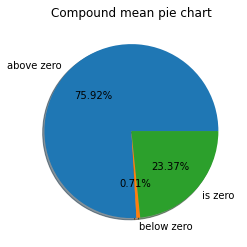

In [308]:
import matplotlib.pyplot as plt

## Above and Below zero
above_zero = listings_df.loc[listings_df['compound_mean'] > 0,'compound_mean'].count()
below_zero = listings_df.loc[listings_df['compound_mean'] < 0,'compound_mean'].count()
equal_zero = listings_df.loc[listings_df['compound_mean'] == 0,'compound_mean'].count()

## Display using a pie chart
y, x = plt.subplots()
l = 'above zero','below zero','is zero'
v = [above_zero,below_zero,equal_zero]

x.pie(v, labels=l, autopct= '%.2f%%', shadow=True)
plt.title('Compound mean pie chart')
plt.show()

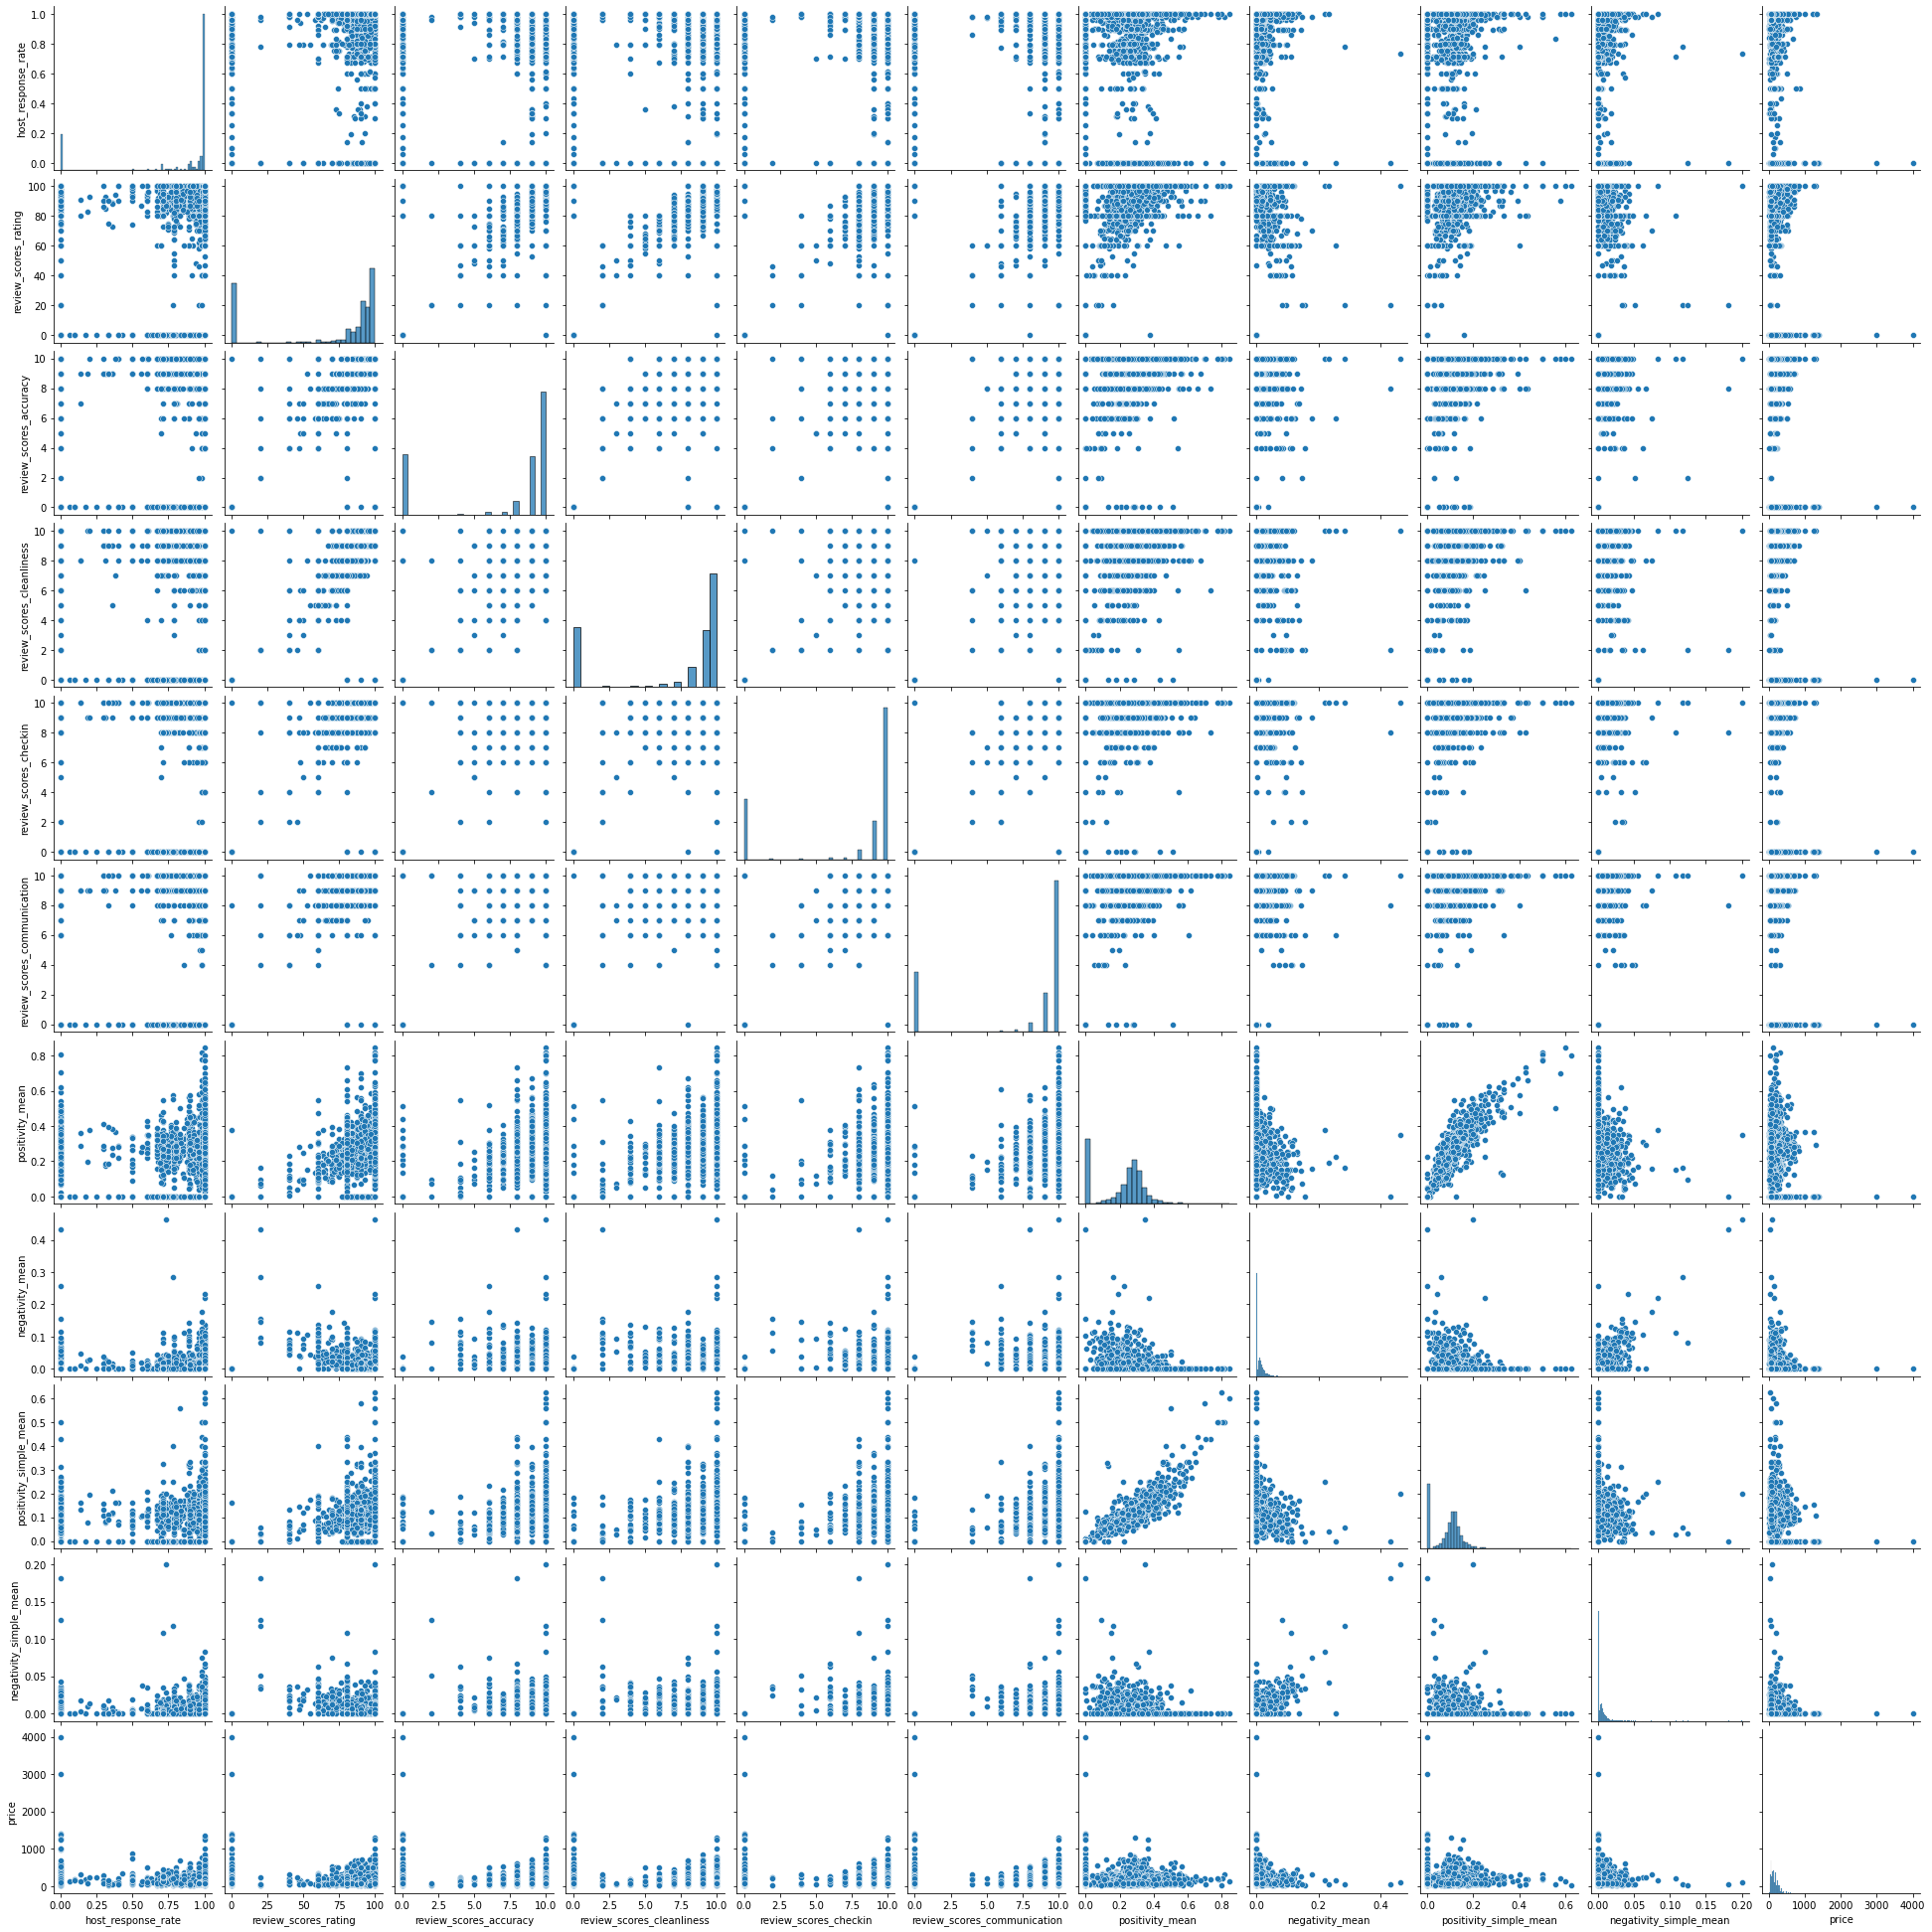

In [309]:
#Pair Plot
import seaborn
seaborn.pairplot(listingnew)

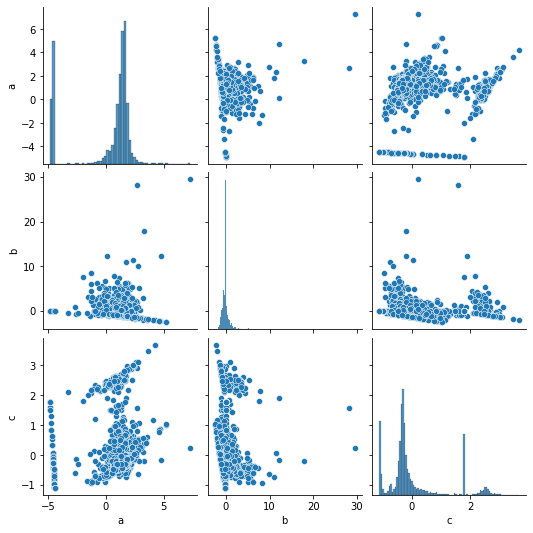

In [310]:
#PCA Pairplot
df_pca = pd.DataFrame(np.array(X_pca), columns=['a', 'b', 'c'])
seaborn.pairplot(df_pca)

In [316]:
#OLS without PCA
df_tab1 = pd.DataFrame(result_dic,index=['coef or num'])
df_tab1[['observations','degrees of freedom','R Square']] = [3585, 3588, 0.49]
pval = list(model.pvalues)
df_tab1.loc['P-value'] = [2.5484397547285033e-106,
 0.01817688992748562,
 0.3022567786096223,
 0.0027692386783721456,
 0.1322460469409028,
 0.1470008145895019,
 0.7661659895474339,
 0.9660238549475751,
 0.21717147620711102,
 0.24059823131916463,None,None,None]
df_tab1

,host_response_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,positivity_mean,negativity_mean,positivity_simple_mean,negativity_simple_mean,observations,degrees of freedom,R Square
coef or num,1.386049e+02,1.106664,-4.231321,11.613347,-7.255185,-7.260719,-20.278982,-8.665723,146.383863,584.772403,3585.0,3588.0,0.49
P-value,2.548440e-106,0.018177,0.302257,0.002769,0.132246,0.147001,0.766166,0.966024,0.217171,0.240598,NaN,NaN,NaN


In [320]:
#OLS with PCA
df_tab2 = pd.DataFrame(np.array(model_ols_pca.params).reshape(1,3), columns = ['X1','X2','X3'], index = ['param'])
df_tab2.loc['P-value'] = np.array(model_ols_pca.pvalues)
df_tab2[['observations','degrees of freedom']] = [3585,3582],[None,None]
df_tab2['R Square'] = [0.007,None]

In [321]:
df_tab2

,X1,X2,X3,observations,degrees of freedom,R Square
param,-0.029831,-0.020567,0.028197,3585.0,3582.0,0.007
P-value,0.000005,0.112647,0.108541,NaN,NaN,NaN
